In [31]:
import pandas as pd
import numpy as np
import sys
import os
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

core_dir = os.path.join(os.getcwd(), '..', 'daphme')
core_dir = os.path.normpath(core_dir)
sys.path.append(core_dir)

import pyarrow as pa
import pyarrow.parquet as pq
import s3fs
s3 = s3fs.S3FileSystem()
import seaborn as sns
from functools import partial

In [12]:
import multiprocessing
from multiprocessing import Pool

In [ ]:
!pip install geojson

In [18]:
import geojson
with open("ZIP_Codes.geojson") as f:
    gj = geojson.load(f)

ModuleNotFoundError: No module named 'geojson'

In [13]:
multiprocessing.cpu_count()

16

In [14]:
s3_path = 's3://phl-pings/gravy_clean'
d_init = date(2019, 10, 7)
vals = list(range(31))
vals = list(map(lambda x: (d_init + timedelta(days=x)).isoformat(), vals))
vals = list(map(lambda x: f'{s3_path}/date={x}/', vals))

In [25]:
def get_users(x):
    #print(x)
    return pq.read_table(x, columns=['identifier']).column('identifier').unique().to_pandas()

def get_user_data(x, users):
    #print(x)
    return pq.read_table(x, filters=[('identifier', 'in', users)]).to_pandas()

## Extract a sample of 40000 users from 31 days

In [16]:
datas = []
with Pool(multiprocessing.cpu_count()) as p:
        datas.extend(p.map(get_users, vals))
all_users = pd.concat(datas).drop_duplicates()
all_users = all_users.rename('identifier')
all_users = all_users.apply(str)
all_users = all_users.sample(40000)

datas = []
with Pool(multiprocessing.cpu_count()) as p:
        datas.extend(p.map(partial(get_user_data, users=all_users), vals))
sample_data = pd.concat(datas).drop_duplicates()

s3://phl-pings/gravy_clean/date=2019-10-07/s3://phl-pings/gravy_clean/date=2019-10-08/s3://phl-pings/gravy_clean/date=2019-10-11/s3://phl-pings/gravy_clean/date=2019-10-12/s3://phl-pings/gravy_clean/date=2019-10-14/s3://phl-pings/gravy_clean/date=2019-10-13/s3://phl-pings/gravy_clean/date=2019-10-15/s3://phl-pings/gravy_clean/date=2019-10-10/s3://phl-pings/gravy_clean/date=2019-10-17/

s3://phl-pings/gravy_clean/date=2019-10-18/s3://phl-pings/gravy_clean/date=2019-10-09/s3://phl-pings/gravy_clean/date=2019-10-16/s3://phl-pings/gravy_clean/date=2019-10-20/s3://phl-pings/gravy_clean/date=2019-10-19/
s3://phl-pings/gravy_clean/date=2019-10-21/

s3://phl-pings/gravy_clean/date=2019-10-22/










s3://phl-pings/gravy_clean/date=2019-10-23/
s3://phl-pings/gravy_clean/date=2019-10-24/
s3://phl-pings/gravy_clean/date=2019-10-25/
s3://phl-pings/gravy_clean/date=2019-10-26/
s3://phl-pings/gravy_clean/date=2019-10-27/
s3://phl-pings/gravy_clean/date=2019-10-28/
s3://phl-pings/gravy_clean/date=

In [37]:
sample_data

identifier     local_timestamp  \
0       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:43:53   
1       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:45:38   
2       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:45:43   
3       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:47:26   
4       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:48:10   
...                                      ...                 ...   
245455  cb32bdfc-9f2c-3f2b-bcd3-fc77fc83deb9 2019-11-06 03:56:44   
245456  cb32bdfc-9f2c-3f2b-bcd3-fc77fc83deb9 2019-11-06 03:56:50   
245457  f136800d-27fb-381a-a35b-017c58bdc29d 2019-11-06 11:07:12   
245458  ce360006-a013-37af-8fbe-c236aa5866b7 2019-11-06 00:37:11   
245459  ce360006-a013-37af-8fbe-c236aa5866b7 2019-11-06 01:42:21   

                                           mercator_coord             x  \
0       b'\x12\x00\x00\x00\x01\x00\x00\x00\xba\xdc\xce... -8.379330e+06   
1       b'\x12\x00\x00\x00\x01\x00\x00\x00\xa6S=\x04\x... -8.383348e+06   
2       b'\x12\x00\x00\x00\x01\x00\x00\x00\xa6S=\x04\x... -8.383348e+06   
3       b'\x12\x00\x00\x00\x01\x00\x00\x00\xa6S=\x04\x... -8.383348e+06   
4       b'\x12\x00\x00\x00\x01\x00\x00\x00\xa6S=\x04\x... -8.383348e+06   
...                                                   ...           ...   
245455  b'\x12\x00\x00\x00\x01\x00\x00\x00\x8d\xcdWm\x... -8.353538e+06   
245456  b'\x12\x00\x00\x00\x01\x00\x00\x00\x8d\xcdWm\x... -8.353538e+06   
245457  b'\x12\x00\x00\x00\x01\x00\x00\x00\xfa\x04k\x0... -8.367196e+06   
245458  b"\x12\x00\x00\x00\x01\x00\x00\x00R\x17\xf5'\x... -8.369757e+06   
245459  b"\x12\x00\x00\x00\x01\x00\x00\x00R\x17\xf5'\x... -8.369757e+06   

                   y  in_geo      date_hour  day_of_week  
0       4.860044e+06    True  2019-10-07 21            2  
1       4.862282e+06   False  2019-10-07 21            2  
2       4.862282e+06   False  2019-10-07 21            2  
3       4.862282e+06   False  2019-10-07 21            2  
4       4.862282e+06   False  2019-10-07 21            2  
...              ...     ...            ...          ...  
245455  4.879453e+06    True  2019-11-06 03            4  
245456  4.879453e+06    True  2019-11-06 03            4  
245457  4.859016e+06    True  2019-11-06 11            4  
245458  4.854935e+06    True  2019-11-06 00            4  
245459  4.854935e+06    True  2019-11-06 01            4  

[6273142 rows x 8 columns]

## Subset data to sample of users

In [13]:
# persist
#sample_data = pd.concat(output_data, ignore_index=True)
#pq.write_table(table, f's3://robustness-project/data_sample_40k.parquet', filesystem=s3)

AttributeError: 'Series' object has no attribute 'columns'

# Incompleteness metrics

In [38]:
sample_data

identifier     local_timestamp  \
0       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:43:53   
1       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:45:38   
2       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:45:43   
3       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:47:26   
4       d68a1494-12a0-367b-95fd-f19d25d8f219 2019-10-07 21:48:10   
...                                      ...                 ...   
245455  cb32bdfc-9f2c-3f2b-bcd3-fc77fc83deb9 2019-11-06 03:56:44   
245456  cb32bdfc-9f2c-3f2b-bcd3-fc77fc83deb9 2019-11-06 03:56:50   
245457  f136800d-27fb-381a-a35b-017c58bdc29d 2019-11-06 11:07:12   
245458  ce360006-a013-37af-8fbe-c236aa5866b7 2019-11-06 00:37:11   
245459  ce360006-a013-37af-8fbe-c236aa5866b7 2019-11-06 01:42:21   

                                           mercator_coord             x  \
0       b'\x12\x00\x00\x00\x01\x00\x00\x00\xba\xdc\xce... -8.379330e+06   
1       b'\x12\x00\x00\x00\x01\x00\x00\x00\xa6S=\x04\x... -8.383348e+06   
2       b'\x12\x00\x00\x00\x01\x00\x00\x00\xa6S=\x04\x... -8.383348e+06   
3       b'\x12\x00\x00\x00\x01\x00\x00\x00\xa6S=\x04\x... -8.383348e+06   
4       b'\x12\x00\x00\x00\x01\x00\x00\x00\xa6S=\x04\x... -8.383348e+06   
...                                                   ...           ...   
245455  b'\x12\x00\x00\x00\x01\x00\x00\x00\x8d\xcdWm\x... -8.353538e+06   
245456  b'\x12\x00\x00\x00\x01\x00\x00\x00\x8d\xcdWm\x... -8.353538e+06   
245457  b'\x12\x00\x00\x00\x01\x00\x00\x00\xfa\x04k\x0... -8.367196e+06   
245458  b"\x12\x00\x00\x00\x01\x00\x00\x00R\x17\xf5'\x... -8.369757e+06   
245459  b"\x12\x00\x00\x00\x01\x00\x00\x00R\x17\xf5'\x... -8.369757e+06   

                   y  in_geo      date_hour  day_of_week  
0       4.860044e+06    True  2019-10-07 21            2  
1       4.862282e+06   False  2019-10-07 21            2  
2       4.862282e+06   False  2019-10-07 21            2  
3       4.862282e+06   False  2019-10-07 21            2  
4       4.862282e+06   False  2019-10-07 21            2  
...              ...     ...            ...          ...  
245455  4.879453e+06    True  2019-11-06 03            4  
245456  4.879453e+06    True  2019-11-06 03            4  
245457  4.859016e+06    True  2019-11-06 11            4  
245458  4.854935e+06    True  2019-11-06 00            4  
245459  4.854935e+06    True  2019-11-06 01            4  

[6273142 rows x 8 columns]

## Barcode plots for different users

In [12]:
sample_data

identifier
109935  dce99cb2-1d07-3bfd-9b05-646405a19f92
15314   a7632c4b-9d06-3d47-b934-e6a69ae21942
387452  2e5c7d1b-b29b-3cb0-8fbb-eb03f1cca6d0
309970  76c29820-0ce6-30f2-ba0b-9cf9ce0a3300
461517  75a4b0b4-32b0-3906-9b1c-0094059b5b65
...                                      ...
148842  5463b83f-5443-3171-9555-db776f28f219
110283  71c603d5-904c-379f-aae9-427591a4fb03
200623  d09bdf8b-eee9-3c7c-a221-2fed88b32013
128925  6768def3-ed60-3d96-9845-04810b537b1b
157164  b1c0fbe2-6062-312c-afea-37a5df638aec

[40000 rows x 1 columns]

In [39]:
print(len(sample_data))
print(len(sample_data.drop_duplicates(['identifier', 'date_hour'])))

6273142
495886


In [40]:
# Plot barcodes
week1 = ('2019-10-08', '2019-10-15')
week2 = ('2019-10-15', '2019-10-22')
week3 = ('2019-10-22', '2019-10-29')
week4 = ('2019-10-29', '2019-11-05')

In [41]:
#select a user with 20 hours in a whole month
hour_counts = sample_data.groupby(['identifier']).date_hour.count()

In [42]:
user1 = hour_counts.loc[(hour_counts>100)&(hour_counts<600)].index[-1]
user2 = hour_counts.loc[(hour_counts>100)&(hour_counts<900)].index[0]
user3 = hour_counts.loc[(hour_counts>100)&(hour_counts<1000)].index[2]
hour_counts[[user1,user2,user3]]

identifier
fff44402-7d12-32a0-9d7c-396dfdd97e00    299
0009925f-a0d6-44af-8373-19c1919af8b4    191
00702fae-be72-3518-b966-5a4ada97eeda    109
Name: date_hour, dtype: int64

In [43]:
def plot_user_timeframe(sample_data, user, start, end, ax=None):
    # If no Axes is passed in, create one
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 1))  # Aspect ratio 10:1

    df = sample_data.loc[(sample_data['identifier'] == user) & 
                         (sample_data['local_timestamp'] > start) & 
                         (sample_data['local_timestamp'] < end)].copy()
    df['day_of_week'] = df['local_timestamp'].dt.dayofweek + df['local_timestamp'].dt.hour / 24.0 + df['local_timestamp'].dt.minute / 1440.0
    #plotting
    ax.hlines(1, 0, 6, color='gray', linewidth=2)
    ax.vlines(df['day_of_week'], 0.95, 1.05, color='gray', linewidth=5, alpha=0.08)
    ax.vlines(df['day_of_week'], 0.95, 1.05, color='gray', linewidth=10, alpha=0.08)
    ax.vlines(df['day_of_week'], 0.95, 1.05, color='black', linewidth=0.5)
    # Set x-axis details
    ax.set_xlim(0, 6)
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    #ax.xaxis.set_label_coords(0.5, -0.5)
    #y-axis
    ax.yaxis.set_visible(False)
    [spine.set_visible(False) for spine in ax.spines.values()]    
    # Title with number of records
    ax.set_title(f"User {user[-4:]}, N={len(df)}, week={start}", fontsize=10, pad=10)
    return ax

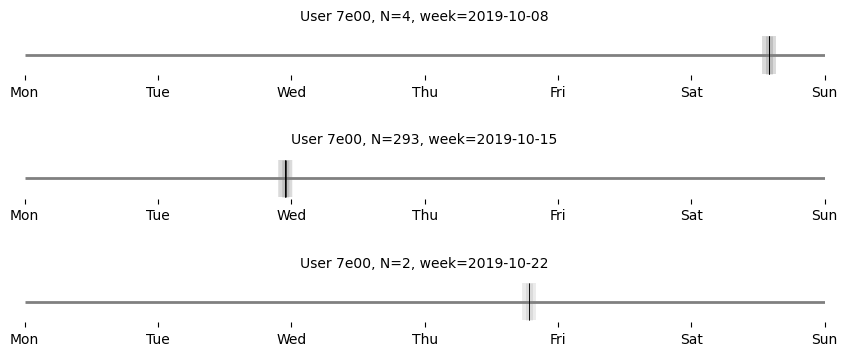

In [45]:
fig, axs = plt.subplots(3, 1, figsize=(10, 3.6))  # for 2 plots, one above the other
plot_user_timeframe(sample_data, user1, week1[0], week1[1], ax=axs[0])
plot_user_timeframe(sample_data, user1, week2[0], week2[1], ax=axs[1])
plot_user_timeframe(sample_data, user1, week3[0], week3[1], ax=axs[2])

fig.subplots_adjust(hspace=2.0, wspace=0.4, top=1.8, bottom=1.0, left=0.1, right=0.9)
#plt.savefig('user1.png')
plt.show()

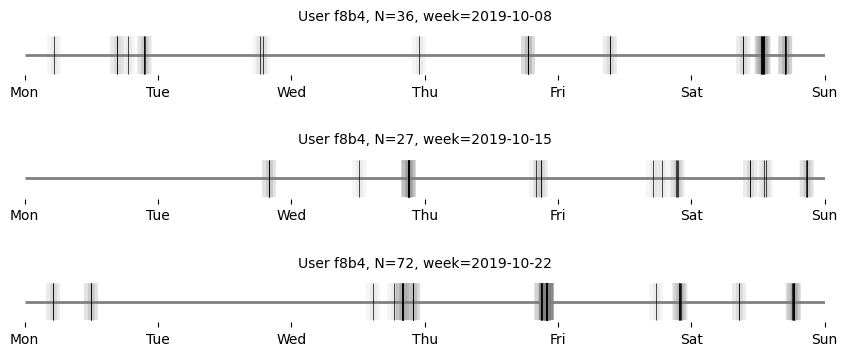

In [47]:
fig, axs = plt.subplots(3, 1, figsize=(10, 3.6))  # for 2 plots, one above the other
plot_user_timeframe(sample_data, user2, week1[0], week1[1], ax=axs[0])
plot_user_timeframe(sample_data, user2, week2[0], week2[1], ax=axs[1])
plot_user_timeframe(sample_data, user2, week3[0], week3[1], ax=axs[2])

fig.subplots_adjust(hspace=2.0, wspace=0.4, top=1.8, bottom=1.0, left=0.1, right=0.9)
#fig.savefig('./user2.png')
plt.show()

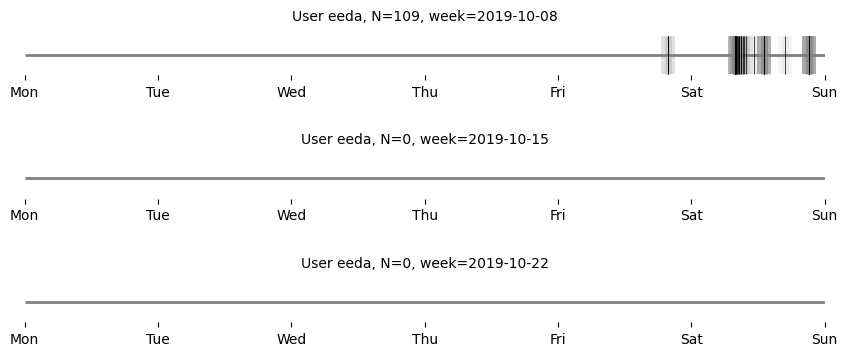

In [49]:
fig, axs = plt.subplots(3, 1, figsize=(10, 3.6))  # for 2 plots, one above the other
plot_user_timeframe(sample_data, user3, week1[0], week1[1], ax=axs[0])
plot_user_timeframe(sample_data, user3, week2[0], week2[1], ax=axs[1])
plot_user_timeframe(sample_data, user3, week3[0], week3[1], ax=axs[2])

fig.subplots_adjust(hspace=2.0, wspace=0.4, top=1.8, bottom=1.0, left=0.1, right=0.9)
#fig.savefig('./user3.png')
plt.show()

## q score for each week

In [50]:
start, end = week1

window = sample_data.loc[(sample_data['local_timestamp'] > start) & 
                         (sample_data['local_timestamp'] < end)].drop_duplicates(['identifier', 'date_hour'])
user_hours = window.groupby(['identifier']).date_hour.count()

In [51]:
user_hours[(user_hours>=3)]

identifier
0009925f-a0d6-44af-8373-19c1919af8b4     15
000df3d0-3a64-32f8-830f-492dac3bf659     10
0010e096-8ab5-35b8-baac-8a176d5a432c      3
00205dc6-586a-308f-be7b-1eab43959bdf      4
00389e47-0f1b-3687-a92f-b160fcbf97ec      6
                                       ... 
ffd9d910-d79f-3008-9691-3f6710ffd2fd      3
ffe945a7-447d-46cc-a64a-dca6a60d7941      3
ffe9a9e9-8099-33f3-b637-a0683bfa2850    163
ffea6c16-fbfc-3ec8-9cf9-ca999ad93a34      5
ffec687d-0ed3-3935-bf27-30033f57f8b5     14
Name: date_hour, Length: 6487, dtype: int64

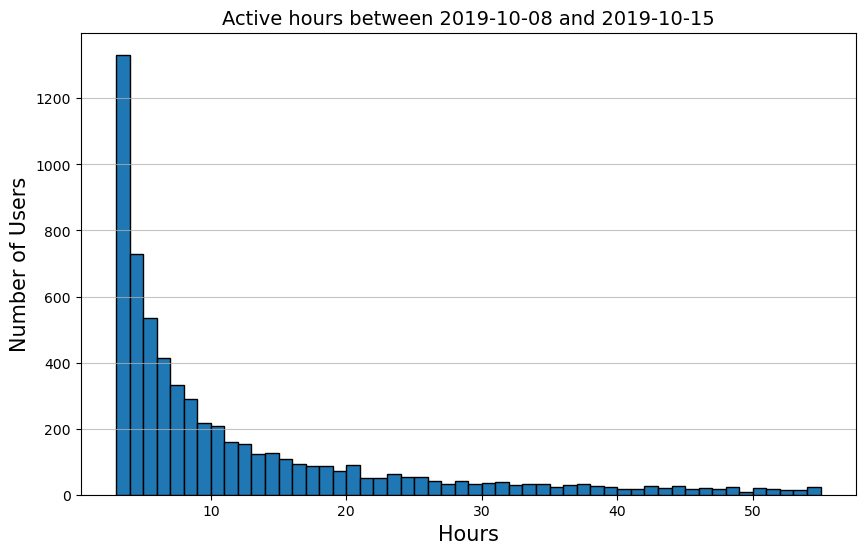

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(user_hours[(user_hours>=3)], bins=range(3, 56), edgecolor='black')  # 168 bins
plt.title(f'Active hours between {start} and {end}', fontsize=14)  # Incorporate start and end into the title
plt.xlabel('Hours', fontsize=15)  # Increase font size for x-axis label
plt.ylabel('Number of Users', fontsize=15)  # Increase font size for y-axis label
plt.grid(axis='y', alpha=0.75)

# Save the figure
#plt.savefig('./histogram.png')

# Show the plot
plt.show()

/tmp/ipykernel_13122/2489615241.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normalized_hours, shade=True, color="blue", linewidth=1.5)


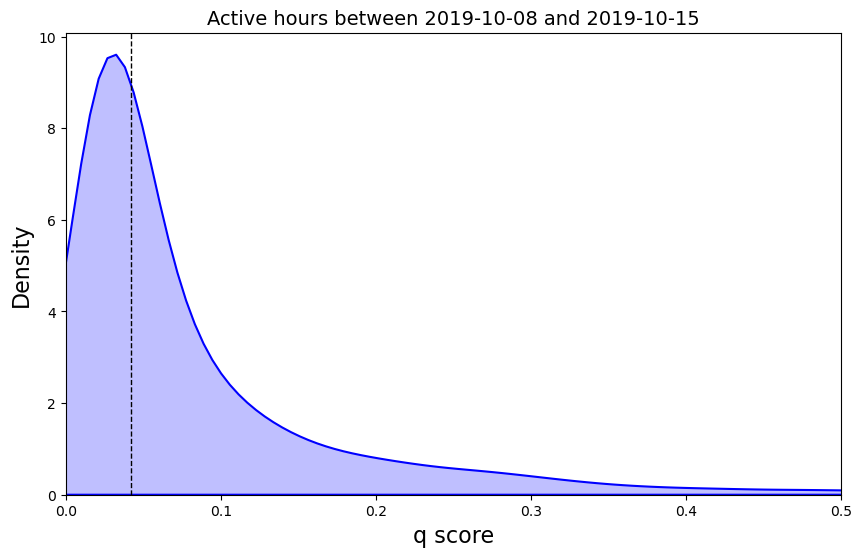

In [53]:
normalized_hours = user_hours[(user_hours>=3)] / 168

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(normalized_hours, shade=True, color="blue", linewidth=1.5)

# Calculate and plot the median line within the specified range
median_value = normalized_hours.median()
plt.axvline(median_value, color='black', linestyle='dashed', linewidth=1)



# Set title and labels with increased font size
plt.title(f'Active hours between {start} and {end}', fontsize=14)
plt.xlabel('q score', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Limit the range of x-axis to be between 0 and 0.4
plt.xlim(0, 0.5)

# Save the figure
#plt.savefig('normalized_hours_density.png')

# Show the plot
plt.show()